In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from astropy.io import fits
data, header = fits.getdata('/Users/Kamilobu/Desktop/foxsi_d6.fits', header=True)

In [68]:
hdu_number = 0
fits.getheader('/Users/Kamilobu/Desktop/foxsi_d6.fits', hdu_number)

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  156                                                  
NAXIS2  =                  156                                                  
DATE    = '2016-12-02'         /                                                
CTYPE1  = 'solar_x '           /Solar X (cartesian west) axis                   
CTYPE2  = 'solar_y '           /Solar Y (cartesian north) axis                  
CUNIT1  = 'arcsec  '           /Arcseconds from center of Sun                   
CUNIT2  = 'arcsec  '           /Arcseconds from center of Sun                   
CRPIX1  =        79.0054234686 /Reference pixel along X dimension               
CRPIX2  =        110.559173266 /Reference pixel along Y dimension               
CRVAL1  =                   

In [41]:
header['DATE_OBS'] = '2014-12-11T19:14:05.75'
header['DATE-OBS'] = '2014-12-11T19:14:05.75'
header['hglt_obs'] = -0.454223
header['CRVAL1'] = 0

In [11]:
fits.writeto('/Users/Kamilobu/Desktop/foxsi_d6.fits', data, header, clobber=True)

In [12]:
from sunpy.map import Map
foxsi_fits = '/Users/Kamilobu/Desktop/foxsi_d6.fits'

In [69]:
#foxsimap = Map(data, header)
foxsimap = Map(foxsi_fits)

/Users/Kamilobu/anaconda/envs/ay250/lib/python3.5/site-packages/sunpy-0.8.dev7190-py3.5-macosx-10.6-x86_64.egg/sunpy/map/mapbase.py:253: Warning: Missing metadata for Sun-spacecraft separation: assuming Sun-Earth distance
  w2.dsun = self.dsun


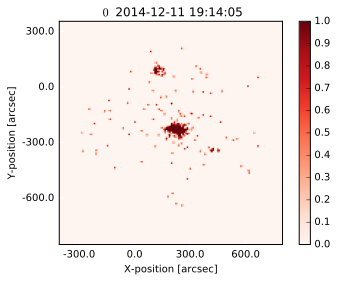

In [39]:
foxsimap.plot(vmax=1,cmap='Reds')
plt.colorbar()

In [15]:
from sunpy.map import MapCubed
from sunpy.map import Map
import glob
import astropy.units as u
from sunpy.time import parse_time
from matplotlib.patches import Rectangle
import numpy as np

In [16]:
data_dir = '/Volumes/500GB/AIA/'
str_indices = {'94':'', '131':'', '171':'', '193':'', '211':'', '304':'', '335':'', '1600':'', '1700':''}
file_list = {}
maps = {}
for key in str_indices:
    file_list.update({key: glob.glob(data_dir + '*' + key + '*.fits')})
    
these_files = file_list['171'][49:90]

maps = []

for f in these_files:
    maps.append(Map(f))

cubed = MapCubed(maps)

[ 0.  0.] pix


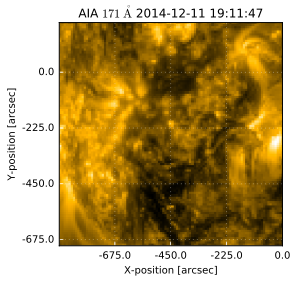

In [17]:
x_range = u.Quantity([-900, 0], 'arcsec')
y_range = u.Quantity([-700, 200], 'arcsec')
scubed = cubed.submap(x_range, y_range)
sscubed = scubed.superpixel(u.Quantity([15 * u.pixel, 15 * u.pixel]))
sscubed[0].plot()

/Users/Kamilobu/anaconda/envs/ay250/lib/python3.5/site-packages/sunpy-0.8.dev7190-py3.5-macosx-10.6-x86_64.egg/sunpy/map/mapbase.py:253: Warning: Missing metadata for Sun-spacecraft separation: assuming Sun-Earth distance
  w2.dsun = self.dsun


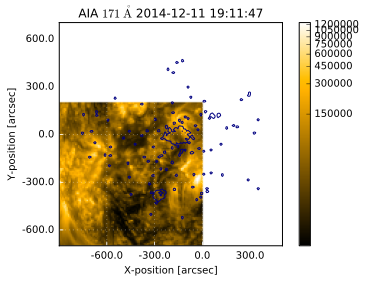

In [45]:
sscubed[0].plot()
foxsimap.draw_contours([1] * u.percent)
plt.colorbar()
plt.show()

In [58]:
from matplotlib.pyplot import contour
contour?

/Users/Kamilobu/anaconda/envs/ay250/lib/python3.5/site-packages/sunpy-0.8.dev7190-py3.5-macosx-10.6-x86_64.egg/sunpy/map/mapbase.py:253: Warning: Missing metadata for Sun-spacecraft separation: assuming Sun-Earth distance
  w2.dsun = self.dsun


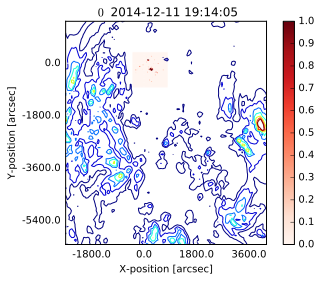

In [57]:
#f, ax1 = plt.subplots()
foxsimap.plot(vmax=1,cmap='Reds')
#sscubed[0].draw_contours([5,10,20,30,45,60,70] * u.percent,origin='image',extent=(-300,600,-700,300))

plt.colorbar()
plt.show()

/Users/Kamilobu/anaconda/envs/ay250/lib/python3.5/site-packages/sunpy-0.8.dev7190-py3.5-macosx-10.6-x86_64.egg/sunpy/map/mapbase.py:253: Warning: Missing metadata for Sun-spacecraft separation: assuming Sun-Earth distance
  w2.dsun = self.dsun
/Users/Kamilobu/anaconda/envs/ay250/lib/python3.5/site-packages/sunpy-0.8.dev7190-py3.5-macosx-10.6-x86_64.egg/sunpy/map/mapbase.py:253: Warning: Missing metadata for Sun-spacecraft separation: assuming Sun-Earth distance
  w2.dsun = self.dsun
/Users/Kamilobu/anaconda/envs/ay250/lib/python3.5/site-packages/sunpy-0.8.dev7190-py3.5-macosx-10.6-x86_64.egg/sunpy/map/mapbase.py:253: Warning: Missing metadata for Sun-spacecraft separation: assuming Sun-Earth distance
  w2.dsun = self.dsun
/Users/Kamilobu/anaconda/envs/ay250/lib/python3.5/site-packages/sunpy-0.8.dev7190-py3.5-macosx-10.6-x86_64.egg/sunpy/map/mapbase.py:253: Warning: Missing metadata for Sun-spacecraft separation: assuming Sun-Earth distance
  w2.dsun = self.dsun
/Users/Kamilobu/anaconda

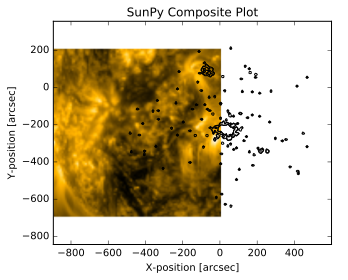

In [71]:
resulmap = Map(sscubed[0],foxsimap, composite=True)
resulmap.set_levels(1,[1,2,7,8],percent=True)
resulmap.plot()